In [1]:

%pprint
%run ../py/storage.py

s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

Pretty printing has been turned OFF
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


In [2]:

os.path.join(s.data_csv_folder, 'Net_Worth_by_Date.csv')

'../data/csv\\Net_Worth_by_Date.csv'

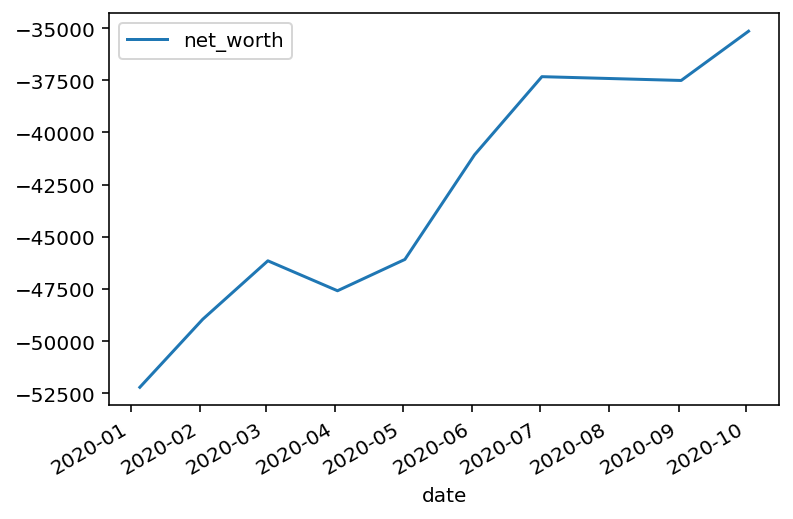

In [11]:

from datetime import datetime

net_worth_df = s.load_csv(csv_name='Net_Worth_by_Date')
net_worth_df['date'] = net_worth_df.date_str.map(lambda x: datetime.strptime(x, '%A, %B %d, %Y'))
net_worth_df = net_worth_df.drop('date_str', axis=1).set_index('date')
net_worth_df.plot.line();

In [41]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline

def func(x, a, b):

    return a*x + b

popt, pcov = curve_fit(func, [nw_date.timestamp() for nw_date in net_worth_df.index],
                       [float(net_worth_df) for net_worth_df in net_worth_df.net_worth])

def get_net_worth(date_numeric):
    '''Get the net worth given a numeric representation of the date'''

    return round(popt[0]*date_numeric + popt[1], 2)

In [44]:

from datetime import date

date_float = datetime.strptime('June 8, 2021', '%B %d, %Y').timestamp()
print(date_float)
get_net_worth(date_float)

1623124800.0


-19241.19

In [48]:

date_float = datetime.strptime('August 8, 2020', '%B %d, %Y').timestamp()
get_net_worth(date_float)

-37983.92